In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
#loading data
Crime_data  = pd.read_csv('C:/Users/OM/Downloads/Crime_data.csv')
print(Crime_data.columns)

Index(['State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')


In [19]:
#chicking for null values
Crime_data.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [20]:
#chicking for duplicates
Crime_data.duplicated().sum()

0

In [21]:
Crime_data.dtypes

State        object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [22]:
#descriptive statistics
Crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<Axes: >

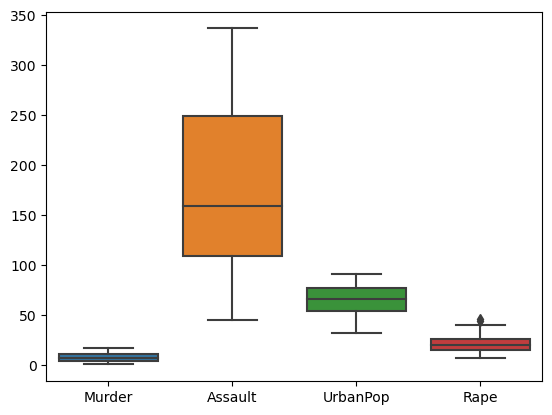

In [23]:
sns.boxplot(Crime_data)

C:\Users\OM\AppData\Local\Temp\ipykernel_11208\3021269964.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Crime_data.corr(),annot=True)


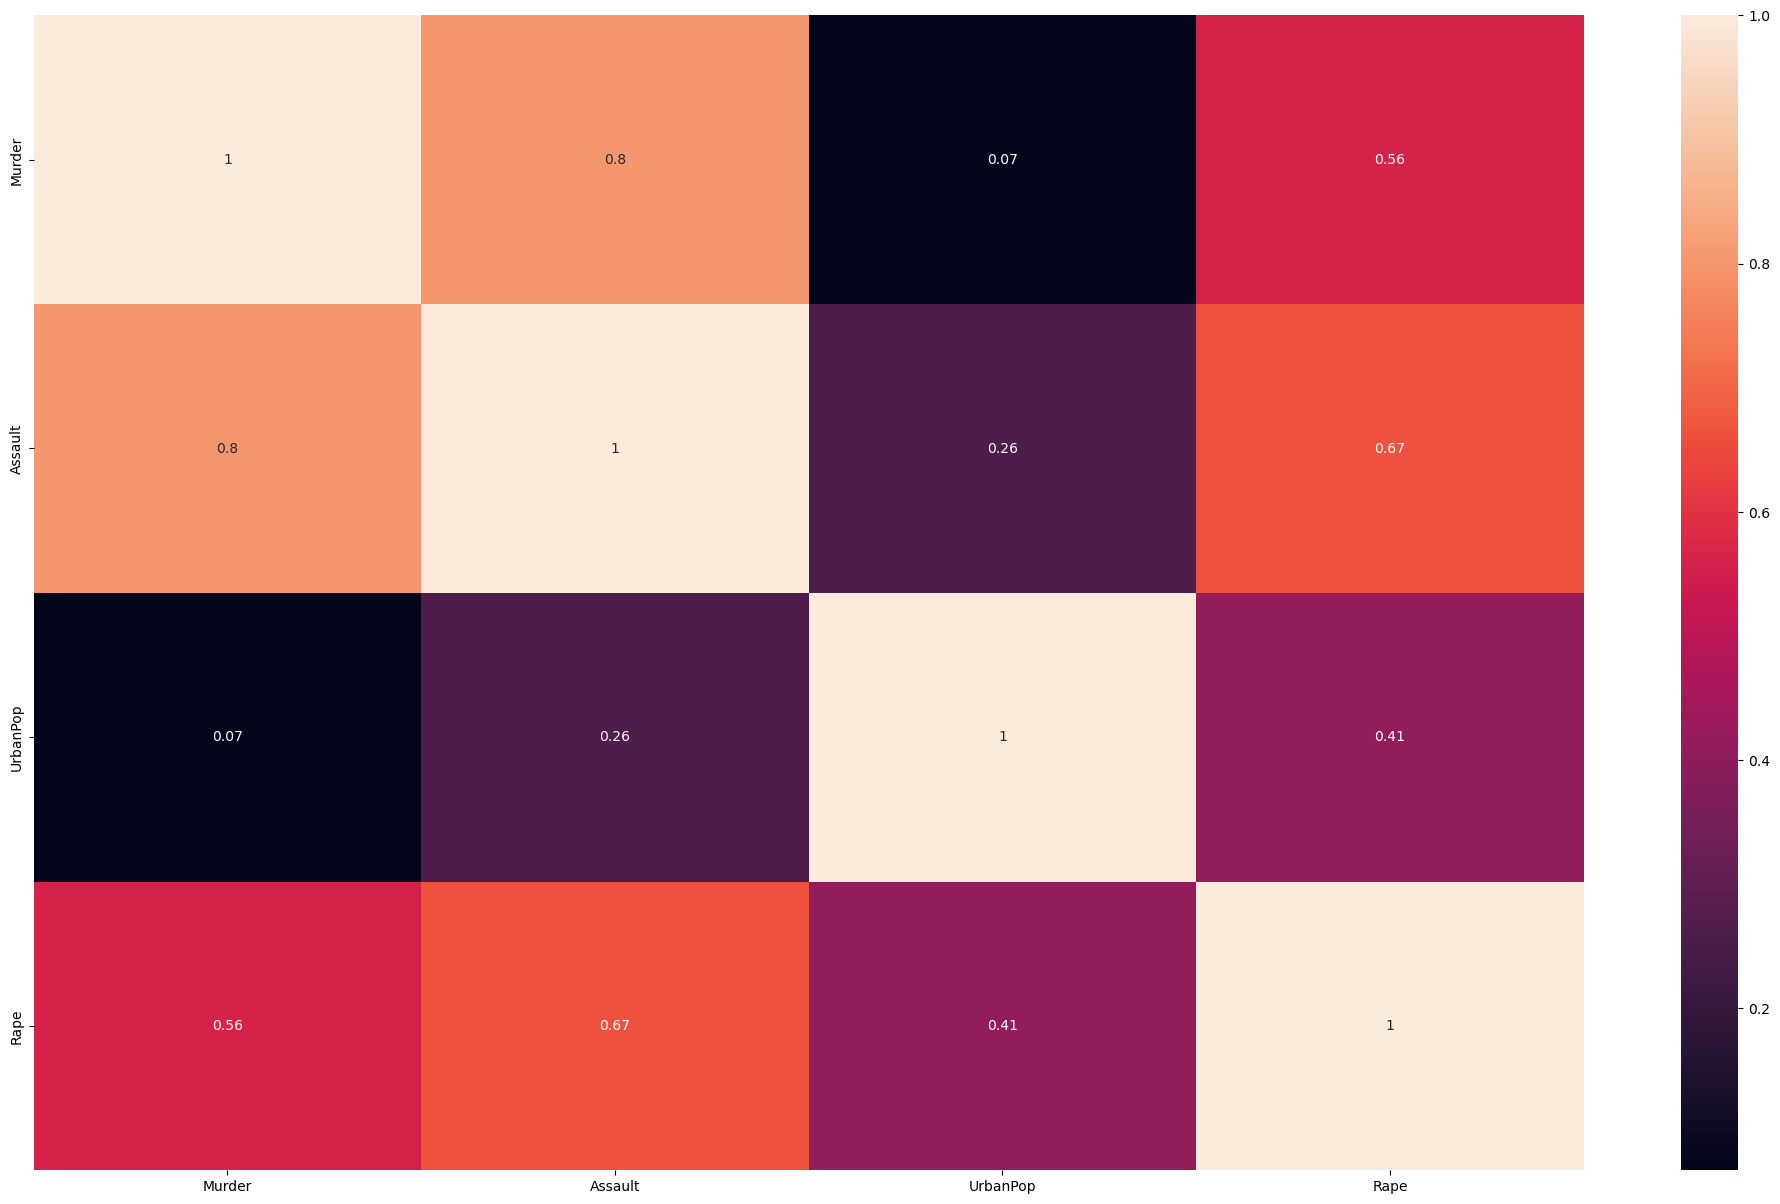

In [24]:
#heatmap
plt.figure(figsize=(25,15))
sns.heatmap(Crime_data.corr(),annot=True)
plt.show()

In [26]:
#EDA in ONE html file
import pandas_profiling as pp
profile = pp.ProfileReport(Crime_data)
profile.to_file('Crime_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
# defaultdict LabelEncoding 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict(LabelEncoder)
# Encoding the variable
Crime_data = Crime_data.apply(lambda lb: d[lb.name].fit_transform(lb))

In [ ]:
#Modeling

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

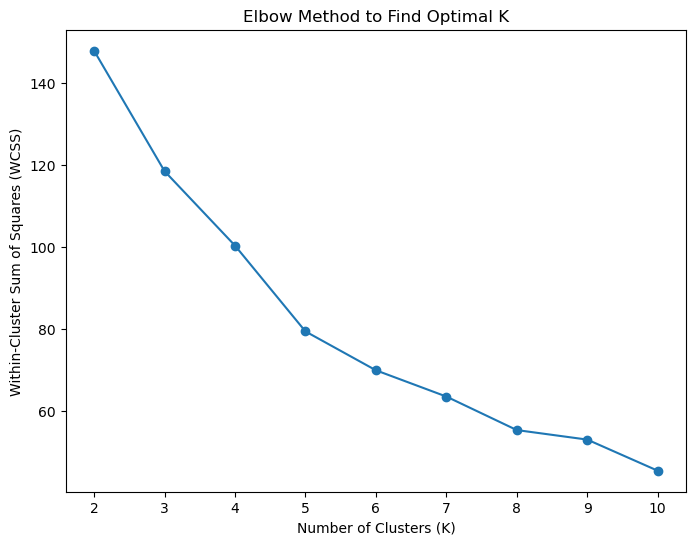

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

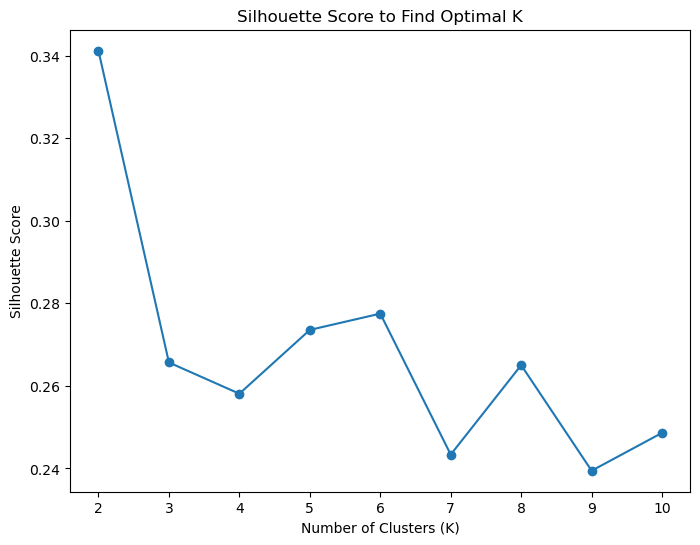

In [29]:
# Standardize the features for K-means
scaler = StandardScaler()
scaled_Crime_data = scaler.fit_transform(Crime_data)
# Find the optimal number of clusters using the elbow method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_Crime_data)
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_Crime_data)
    silhouette_scores.append(silhouette_score(scaled_Crime_data, kmeans_labels))

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [45]:

# Choose the optimal value of k (based on the elbow curve and/or silhouette score)
optimal_k = 4


# Perform K-means clustering with the optimal value of k
kmeans = KMeans(n_clusters=optimal_k, random_state=123)
kmeans_labels = kmeans.fit_predict(scaled_Crime_data )

# Add the cluster labels to the original dataset
Crime_data['Cluster'] = kmeans_labels

# Analyze and interpret the clusters
cluster_summary = Crime_data.groupby('Cluster').mean()
print(cluster_summary)

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


             State     Murder    Assault   UrbanPop       Rape
Cluster                                                       
0        30.000000   4.909091   6.545455   7.818182   6.727273
1        18.750000  31.000000  34.750000  26.833333  39.500000
2        28.764706  14.470588  16.941176  23.117647  20.000000
3        18.100000  35.800000  31.000000   8.200000  26.600000


In [46]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(Crime_data)
silhouette_avg = silhouette_score(Crime_data, kmeans_labels)
silhouette_avg

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.2859917787895704

In [43]:
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(Crime_data)
db_index = davies_bouldin_score(Crime_data, kmeans_labels)
db_index

C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\OM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1.090189235025443

In [47]:
#Hierarchical clustering
Crime_data

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,0,38,30,12,26,3
1,1,29,37,4,46,3
2,2,24,41,28,40,1
3,3,26,26,5,21,3
4,4,27,38,35,45,1
5,5,23,28,27,44,1
6,6,6,13,26,6,2
7,7,15,31,22,13,2
8,8,40,43,28,41,1
9,9,42,29,14,33,3


In [49]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

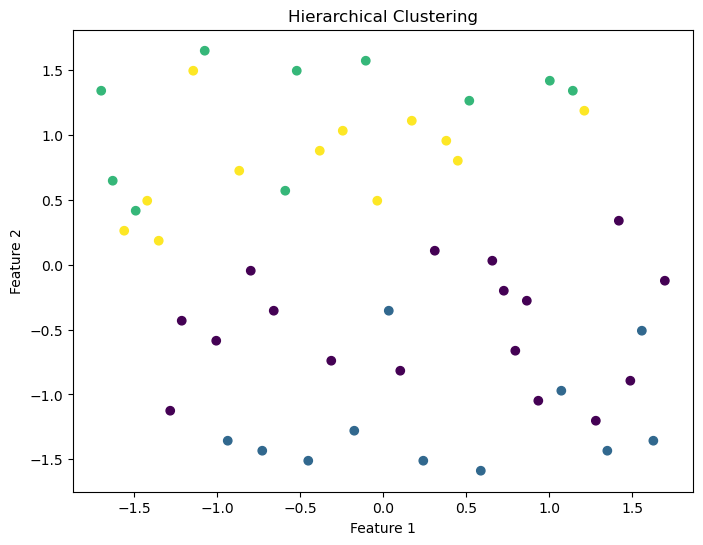

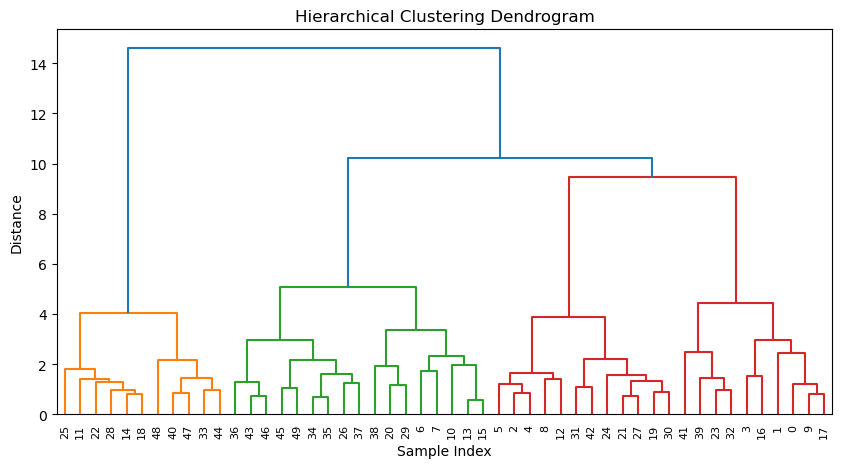

In [50]:
# For this example, we'll use standard scaling on the sample data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Crime_data)

# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(scaled_data)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plotting dendrogram for hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [52]:
cluster_sizes = Crime_data['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
2    17
1    12
0    11
3    10
Name: Cluster, dtype: int64
